In [1]:
import numpy as np
import pandas as pd
import tushare as ts

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 确保可以显示‘-’号
mpl.rcParams['axes.unicode_minus']=False
# 确保中文显示正常
mpl.rcParams['font.sans-serif'] = ['SimHei']  

import warnings; warnings.simplefilter('ignore')

## Data Prep: 获取本地数据并初步清理

In [2]:
index_data = pd.read_csv('index_data.csv')
north_data = pd.read_csv('north_data.csv')
result_df = pd.read_csv('result_df.csv')

In [3]:
index_data.head()

,trade_date,上证综指,深证成指,沪深300,创业板指,上证50,中证500,中小板指,上证180
0,2014-11-17,2474.009,8283.804,2567.101,1471.685,1708.096,4958.466,5382.963,5637.859
1,2014-11-18,2456.366,8196.594,2541.416,1481.860,1679.423,4967.651,5389.135,5571.036
2,2014-11-19,2450.986,8225.073,2537.223,1505.552,1671.654,4985.101,5418.177,5557.197
3,2014-11-20,2452.660,8205.377,2537.099,1494.591,1676.598,4974.626,5381.925,5561.838
4,2014-11-21,2486.791,8332.298,2583.455,1504.833,1714.711,5029.773,5425.351,5674.553


In [4]:
index_data.tail()

,trade_date,上证综指,深证成指,沪深300,创业板指,上证50,中证500,中小板指,上证180
1395,2020-08-06,3386.4631,13863.1298,4762.7642,2814.3737,3292.2003,6770.3016,9222.7909,9798.7426
1396,2020-08-07,3354.0352,13648.4996,4707.9262,2749.9533,3263.7455,6688.8822,9095.9286,9707.9816
1397,2020-08-10,3379.2524,13657.3134,4724.8697,2735.2561,3285.7602,6725.2956,9079.2589,9760.5009
1398,2020-08-11,3340.2900,13466.2675,4681.7837,2688.7004,3262.8244,6600.8472,8974.4587,9671.6450
1399,2020-08-12,3319.2656,13308.5217,4647.6446,2635.5022,3249.7381,6528.3999,8916.4511,9614.0586


In [5]:
index_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 9 columns):
trade_date    1400 non-null object
上证综指          1400 non-null float64
深证成指          1400 non-null float64
沪深300         1400 non-null float64
创业板指          1400 non-null float64
上证50          1400 non-null float64
中证500         1400 non-null float64
中小板指          1400 non-null float64
上证180         1400 non-null float64
dtypes: float64(8), object(1)
memory usage: 98.5+ KB


In [6]:
index_data.set_index('trade_date', inplace = True)

In [7]:
index_data.index = pd.to_datetime(index_data.index)

In [8]:
index_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1400 entries, 2014-11-17 to 2020-08-12
Data columns (total 8 columns):
上证综指     1400 non-null float64
深证成指     1400 non-null float64
沪深300    1400 non-null float64
创业板指     1400 non-null float64
上证50     1400 non-null float64
中证500    1400 non-null float64
中小板指     1400 non-null float64
上证180    1400 non-null float64
dtypes: float64(8)
memory usage: 98.4 KB


In [9]:
index_data.head()

,上证综指,深证成指,沪深300,创业板指,上证50,中证500,中小板指,上证180
trade_date,,,,,,,,
2014-11-17,2474.009,8283.804,2567.101,1471.685,1708.096,4958.466,5382.963,5637.859
2014-11-18,2456.366,8196.594,2541.416,1481.860,1679.423,4967.651,5389.135,5571.036
2014-11-19,2450.986,8225.073,2537.223,1505.552,1671.654,4985.101,5418.177,5557.197
2014-11-20,2452.660,8205.377,2537.099,1494.591,1676.598,4974.626,5381.925,5561.838
2014-11-21,2486.791,8332.298,2583.455,1504.833,1714.711,5029.773,5425.351,5674.553


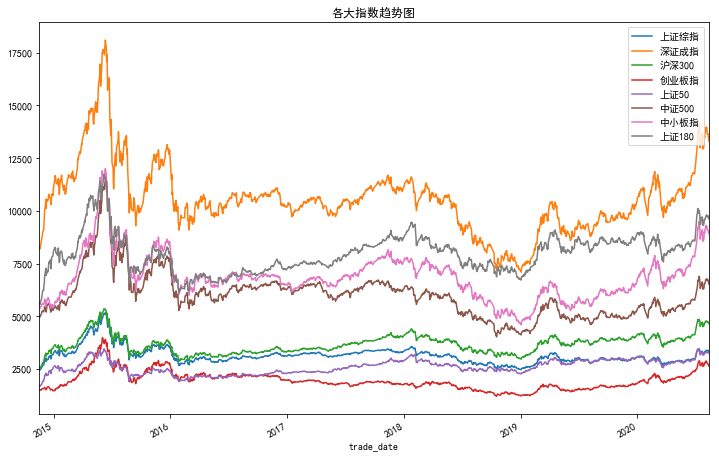

In [10]:
index_data.plot(figsize = (12,8))
plt.title('各大指数趋势图')
plt.legend(loc='upper right')
#plt.show()


In [11]:
north_data.head()

,trade_date,trade_date.1,ggt_ss,ggt_sz,hgt,sgt,north_money,south_money
0,2014-11-17,20141117,1768.0,NaN,13000.0,NaN,13000.0,1768.0
1,2014-11-18,20141118,800.0,NaN,4845.0,NaN,4845.0,800.0
2,2014-11-19,20141119,253.0,NaN,2612.0,NaN,2612.0,253.0
3,2014-11-20,20141120,196.0,NaN,2276.0,NaN,2276.0,196.0
4,2014-11-21,20141121,186.0,NaN,2341.0,NaN,2341.0,186.0


In [12]:
north_data.set_index('trade_date', inplace = True)

In [13]:
north_data.index = pd.DatetimeIndex(north_data.index)

In [14]:
del north_data['trade_date.1']

In [15]:
north_data.head()

,ggt_ss,ggt_sz,hgt,sgt,north_money,south_money
trade_date,,,,,,
2014-11-17,1768.0,NaN,13000.0,NaN,13000.0,1768.0
2014-11-18,800.0,NaN,4845.0,NaN,4845.0,800.0
2014-11-19,253.0,NaN,2612.0,NaN,2612.0,253.0
2014-11-20,196.0,NaN,2276.0,NaN,2276.0,196.0
2014-11-21,186.0,NaN,2341.0,NaN,2341.0,186.0


In [16]:
result_df.head()

,trade_date,close,open,北向资金
0,2014-11-17,2567.101,2613.513,13000.0
1,2014-11-18,2541.416,2565.273,4845.0
2,2014-11-19,2537.223,2538.233,2612.0
3,2014-11-20,2537.099,2528.780,2276.0
4,2014-11-21,2583.455,2537.538,2341.0


## I. EDA: 探索性分析

In [17]:
index_data.head()

,上证综指,深证成指,沪深300,创业板指,上证50,中证500,中小板指,上证180
trade_date,,,,,,,,
2014-11-17,2474.009,8283.804,2567.101,1471.685,1708.096,4958.466,5382.963,5637.859
2014-11-18,2456.366,8196.594,2541.416,1481.860,1679.423,4967.651,5389.135,5571.036
2014-11-19,2450.986,8225.073,2537.223,1505.552,1671.654,4985.101,5418.177,5557.197
2014-11-20,2452.660,8205.377,2537.099,1494.591,1676.598,4974.626,5381.925,5561.838
2014-11-21,2486.791,8332.298,2583.455,1504.833,1714.711,5029.773,5425.351,5674.553


Text(0.5, 1.0, 'A股指数累积收益率\n 2014-2020')

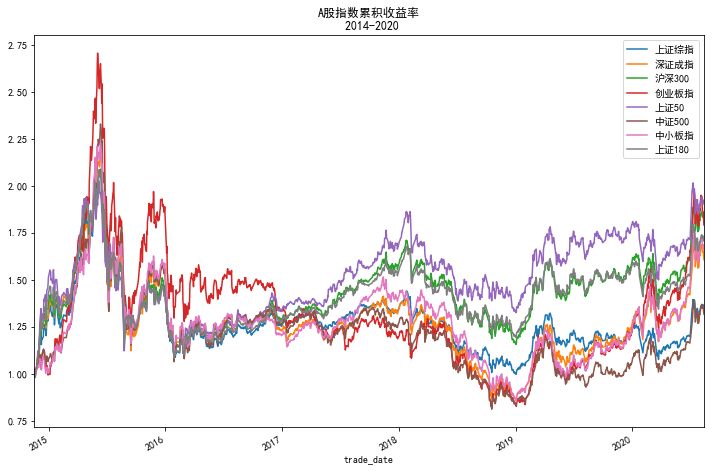

In [18]:
(index_data/index_data.iloc[0]).plot(figsize=(12,8))
plt.title('A股指数累积收益率\n 2014-2020',size=12)

#### 先看一下指数收益率和北向资金的相关性

In [19]:
index_data_return = index_data/index_data.shift(1) - 1
all_data = index_data_return.join(north_data['north_money'], how = 'inner')

In [20]:
all_data.rename(columns={'north_money':'北向资金'},inplace=True)
all_data.dropna(inplace=True)
all_data.corr()

,上证综指,深证成指,沪深300,创业板指,上证50,中证500,中小板指,上证180,北向资金
上证综指,1.000000,0.924464,0.979941,0.765474,0.907355,0.890101,0.865520,0.970900,0.252699
深证成指,0.924464,1.000000,0.916748,0.901830,0.753318,0.962117,0.961679,0.860130,0.290307
沪深300,0.979941,0.916748,1.000000,0.740999,0.942523,0.849081,0.858023,0.989113,0.291449
创业板指,0.765474,0.901830,0.740999,1.000000,0.534840,0.923303,0.937949,0.667121,0.263519
上证50,0.907355,0.753318,0.942523,0.534840,1.000000,0.652926,0.668452,0.974577,0.270995
中证500,0.890101,0.962117,0.849081,0.923303,0.652926,1.000000,0.962797,0.789607,0.235865
中小板指,0.865520,0.961679,0.858023,0.937949,0.668452,0.962797,1.000000,0.789089,0.293066
上证180,0.970900,0.860130,0.989113,0.667121,0.974577,0.789607,0.789089,1.000000,0.272773
北向资金,0.252699,0.290307,0.291449,0.263519,0.270995,0.235865,0.293066,0.272773,1.000000


#### 相关系数来看（0.2358-0.2931）北向资金和各大指数收益率相关性不高
## 相关性不高有可能是长期来看，北上资金体量与整体相对小的原因，我们可以从短期视角再度考量

In [21]:
all_data.tail()

,上证综指,深证成指,沪深300,创业板指,上证50,中证500,中小板指,上证180,北向资金
trade_date,,,,,,,,,
2020-08-06,0.002635,-0.007005,-0.003003,-0.016036,-0.000033,-0.000375,-0.005655,0.002676,-2547.51
2020-08-07,-0.009576,-0.015482,-0.011514,-0.022890,-0.008643,-0.012026,-0.013755,-0.009263,-1862.27
2020-08-10,0.007518,0.000646,0.003599,-0.005345,0.006745,0.005444,-0.001833,0.005410,7.37
2020-08-11,-0.011530,-0.013989,-0.009119,-0.017021,-0.006980,-0.018505,-0.011543,-0.009104,3948.22
2020-08-12,-0.006294,-0.011714,-0.007292,-0.019786,-0.004011,-0.010975,-0.006464,-0.005954,-1637.74


In [22]:
all_data.rolling(120).corr().tail(18)

上证综指      深证成指     沪深300      创业板指      上证50     中证500  \
trade_date                                                                     
2020-08-11 上证综指   1.000000  0.929457  0.986640  0.831426  0.963581  0.919860   
           深证成指   0.929457  1.000000  0.944934  0.963454  0.843437  0.979445   
           沪深300  0.986640  0.944934  1.000000  0.850651  0.969342  0.908067   
           创业板指   0.831426  0.963454  0.850651  1.000000  0.720546  0.949904   
           上证50   0.963581  0.843437  0.969342  0.720546  1.000000  0.804409   
           中证500  0.919860  0.979445  0.908067  0.949904  0.804409  1.000000   
           中小板指   0.893410  0.987593  0.915993  0.958011  0.803069  0.964081   
           上证180  0.986844  0.891171  0.987347  0.779611  0.991035  0.863862   
           北向资金   0.665719  0.635256  0.699737  0.579610  0.701188  0.575352   
2020-08-12 上证综指   1.000000  0.929499  0.987080  0.832694  0.964184  0.921310   
           深证成指   0.929499  1.000000  0.945616  0.964512  0.843982  0.980542   
           沪深300  0.987080  0.945616  1.000000  0.854003  0.969139  0.911526   
           创业板指   0.832694  0.964512  0.854003  1.000000  0.723766  0.949704   
           上证50   0.964184  0.843982  0.969139  0.723766  1.000000  0.808102   
           中证500  0.921310  0.980542  0.911526  0.949704  0.808102  1.000000   
           中小板指   0.893568  0.987329  0.916322  0.958564  0.803494  0.965511   
           上证180  0.987040  0.891497  0.987366  0.782050  0.991134  0.866490   
           北向资金   0.666148  0.635636  0.700535  0.580554  0.702172  0.576626   

                      中小板指     上证180      北向资金  
trade_date                                      
2020-08-11 上证综指   0.893410  0.986844  0.665719  
           深证成指   0.987593  0.891171  0.635256  
           沪深300  0.915993  0.987347  0.699737  
           创业板指   0.958011  0.779611  0.579610  
           上证50   0.803069  0.991035  0.701188  
           中证500  0.964081  0.863862  0.575352  
           中小板指   1.000000  0.854813  0.628225  
           上证180  0.854813  1.000000  0.690364  
           北向资金   0.628225  0.690364  1.000000  
2020-08-12 上证综指   0.893568  0.987040  0.666148  
           深证成指   0.987329  0.891497  0.635636  
           沪深300  0.916322  0.987366  0.700535  
           创业板指   0.958564  0.782050  0.580554  
           上证50   0.803494  0.991134  0.702172  
           中证500  0.965511  0.866490  0.576626  
           中小板指   1.000000  0.855046  0.628698  
           上证180  0.855046  1.000000  0.690962  
           北向资金   0.628698  0.690962  1.000000

## 北向资金与各大指数的滚动窗口120日相关系数较大（0.57-0.7），可见中短期北上资金大小对指数收益有一定指导意义。
#### 以沪深300（相关系数最大0.7）为例，对其与指数收益散点图线性回归拟合（Pair trading？TBExp）

Text(0, 0.5, '沪深300收益率')

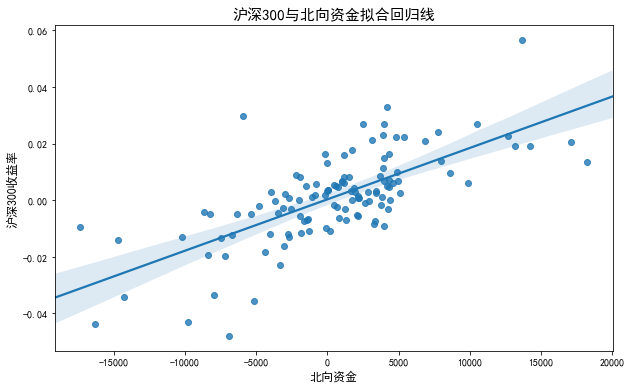

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(x=list(all_data["北向资金"][-120:]),y=list(all_data["沪深300"][-120:]))
plt.title('沪深300与北向资金拟合回归线',size=15)
plt.xlabel('北向资金',size=12)
plt.ylabel('沪深300收益率',size=12)

Text(0.5, 1.0, '沪深300日收益率 VS 北向资金')

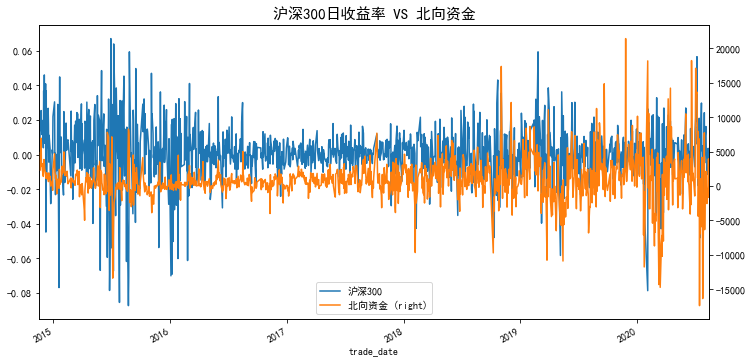

In [24]:
#沪深300指数收益率与北向资金
final_data=all_data[['沪深300','北向资金']].dropna()
final_data.plot(secondary_y='北向资金',figsize=(12,6))
plt.title('沪深300日收益率 VS 北向资金',size=15)

In [25]:
#获取北向资金与沪深300收益率的滚动窗口相关系数
def cal_rol_cor(data,period=30):
    cors=data.rolling(period).corr()
    cors=cors.dropna().iloc[1::2,0]
    cors=cors.reset_index()
    cors=cors.set_index('trade_date')
    return cors['沪深300']

In [26]:
cor=cal_rol_cor(final_data,period=120)
cor.describe()

count    1236.000000
mean        0.334559
std         0.219806
min        -0.215172
25%         0.219457
50%         0.379527
75%         0.525442
max         0.705992
Name: 沪深300, dtype: float64

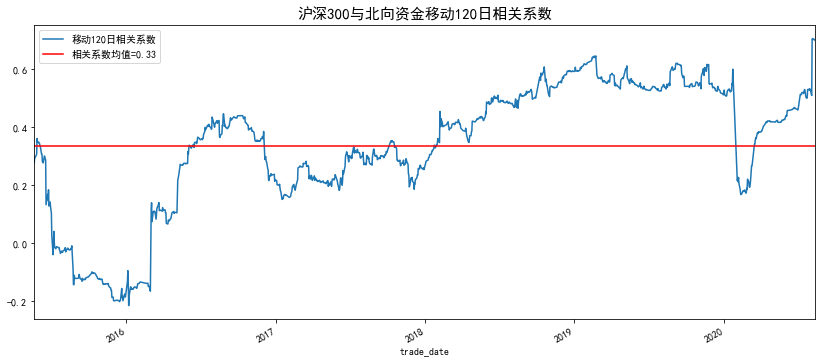

In [27]:
cor.plot(figsize=(14,6),label='移动120日相关系数')
plt.title('沪深300与北向资金移动120日相关系数',size=15)
plt.axhline(cor.mean(), c='r',label='相关系数均值=0.33')
plt.legend(loc=2)
plt.show()

#### 最后从纵向角度考察沪深300收益率与北上资金的相关性。
数据显示，2014年至2020年8月期间，二者相关系数均值为0.33，最大值为0.7.二者的相关性近年来逐渐走高。

## II. 策略部分（TBD）

从上面的探索性分析发现，北上资金与各大指数中短期内存在一定的正相关性。下面参考华泰金工研报的思路，基于北向资金变动数据构建布林带择时策略，并对择时模型进行回测分析。

策略思路如下：
（1） 当该日北向资金流入规模 > 过去 252 个交易日的北向资金均值 + 1.5 倍标准差， 则全仓买入沪深 300；
（2） 当该日北向资金流入规模 < 过去 252 个交易日的北向资金均值 - 1.5 倍标准差， 则清仓卖出沪深 300；
（3） 以每日收盘价与前一日的收盘价来计量当日的收益率。

### 1. 数据处理

In [28]:
result_df.head()

,trade_date,close,open,北向资金
0,2014-11-17,2567.101,2613.513,13000.0
1,2014-11-18,2541.416,2565.273,4845.0
2,2014-11-19,2537.223,2538.233,2612.0
3,2014-11-20,2537.099,2528.780,2276.0
4,2014-11-21,2583.455,2537.538,2341.0


In [29]:
result_df.set_index('trade_date', inplace = True)

In [30]:
result_df.index = pd.to_datetime(result_df.index)

In [31]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1356 entries, 2014-11-17 to 2020-08-12
Data columns (total 3 columns):
close    1356 non-null float64
open     1356 non-null float64
北向资金     1356 non-null float64
dtypes: float64(3)
memory usage: 42.4 KB


In [32]:
data = result_df
data.head()

,close,open,北向资金
trade_date,,,
2014-11-17,2567.101,2613.513,13000.0
2014-11-18,2541.416,2565.273,4845.0
2014-11-19,2537.223,2538.233,2612.0
2014-11-20,2537.099,2528.780,2276.0
2014-11-21,2583.455,2537.538,2341.0


### 2. 策略逻辑： 
#### 2.1 交易信号
(1） 当该日北向资金流入规模 > 过去 252 个交易日的北向资金均值 + 1.5 倍标准差， 则全仓买入沪深 300； （2） 当该日北向资金流入规模 < 过去 252 个交易日的北向资金均值 - 1.5 倍标准差， 则清仓卖出沪深 300； 

In [33]:
data['signal'] = np.where(data['北向资金'] > (data['北向资金'].rolling(252).mean() + 1.5 * data['北向资金'].rolling(252).std()), 1, 0)
data['signal'] = np.where(data['北向资金'] < (data['北向资金'].rolling(252).mean() - 1.5 * data['北向资金'].rolling(252).std()), -1, data['signal'])

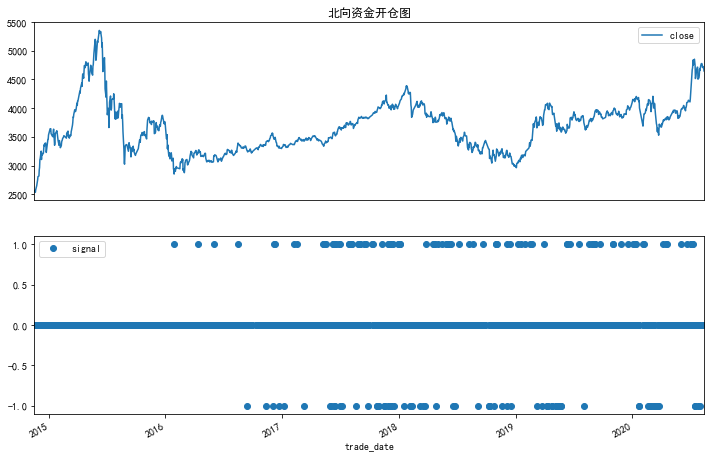

In [34]:
#data['signal'].plot(figsize= (12,8))

plt.subplot(2, 1, 1)
plt.title('北向资金开仓图')
plt.gca().axes.get_xaxis().set_visible(False)
data['close'].plot(figsize = (12,8))
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
data['signal'].plot(figsize = (12,8),marker='o',linestyle='')
plt.legend(loc='upper left')
plt.show()

#### 2.2 持仓计算


In [35]:
position = 0

for i, items in data.iterrows():
    
    if items['signal'] == 1:
        position = 1
    elif items['signal'] == -1:
        position = -1
    else:
        pass
    
    data.loc[i, 'position'] = position
    

In [36]:
data.tail()

,close,open,北向资金,signal,position
trade_date,,,,,
2020-08-06,4762.7642,4779.2377,-2547.51,0,-1.0
2020-08-07,4707.9262,4742.2939,-1862.27,0,-1.0
2020-08-10,4724.8697,4681.7553,7.37,0,-1.0
2020-08-11,4681.7837,4730.3748,3948.22,0,-1.0
2020-08-12,4647.6446,4668.8899,-1637.74,0,-1.0


Text(0.5, 0.98, '沪深300持仓情况')

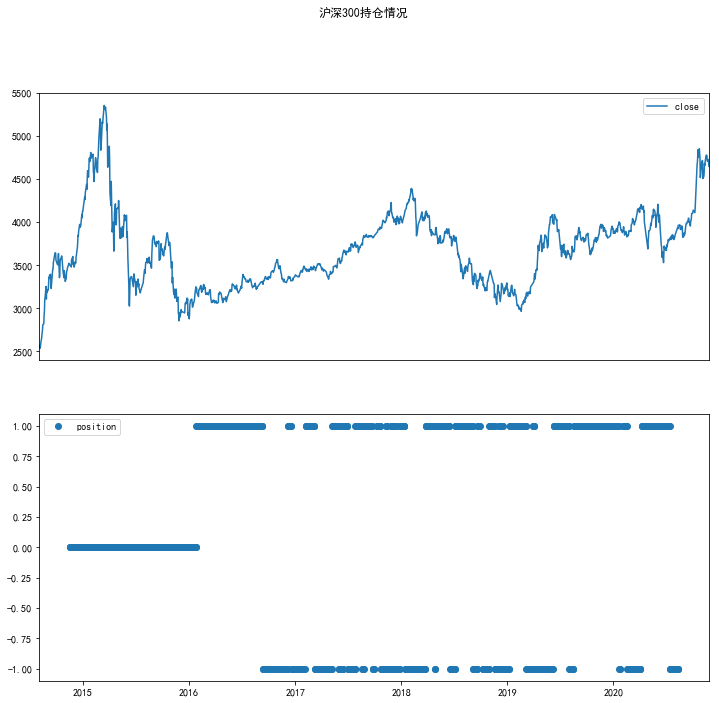

In [43]:
# 绘制持仓情况图
plt.subplot(2,1,1)
plt.gca().axes.get_xaxis().set_visible(False)
data['close'].plot(figsize=(12,12))
plt.legend()

plt.subplot(2,1,2)
plt.plot(data['position'], marker='o', linestyle='')
plt.legend()
plt.suptitle('沪深300持仓情况')

### 3.计算收益并绘图

In [38]:
data['return'] = data['close'].pct_change()

In [39]:
data['cum_return'] = (data['return']+1).cumprod()

In [64]:
data['strategy_return'] = data['return'] * data['position'].shift(1) #避免未来函数

In [65]:
data['cum_strategy_return'] = (data['strategy_return']+1).cumprod()

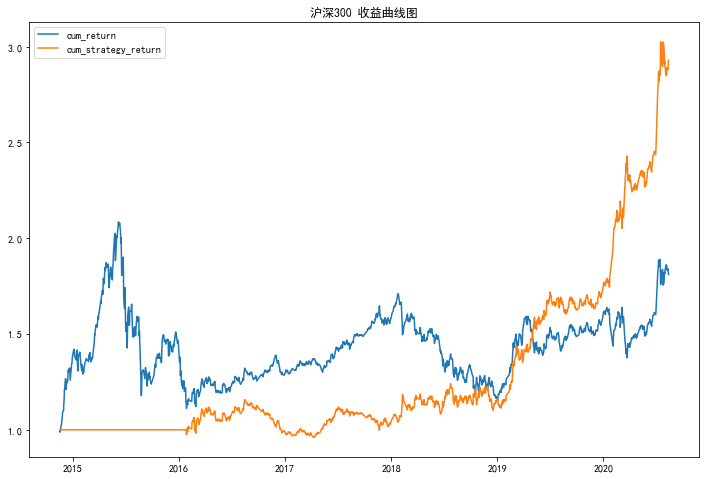

In [67]:
# 绘图
fig = plt.figure(figsize = (12,8))
plt.plot(data['cum_return'])
plt.plot(data['cum_strategy_return'])
plt.title('沪深300 收益曲线图')
plt.legend(loc='upper left')
plt.show()

###  策略在2019年后表现突出， 但并未考虑交易成本以及滑点等交易成本。
预计考虑到相关成本后收益率曲线会大幅下降，更精准的回测需要在优矿，米宽等三方平台上进一步研究。